<a href="https://colab.research.google.com/github/emrullahozkilinc/machine-learning/blob/master/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
url="https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/heart.csv"
data = pd.read_csv(url)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([ 1.,  0.,  6.,  5.,  7., 26., 19., 19., 12., 25., 32., 28., 44.,
        19., 19., 24.,  7.,  7.,  1.,  2.]),
 array([29. , 31.4, 33.8, 36.2, 38.6, 41. , 43.4, 45.8, 48.2, 50.6, 53. ,
        55.4, 57.8, 60.2, 62.6, 65. , 67.4, 69.8, 72.2, 74.6, 77. ]),
 <a list of 20 Patch objects>)

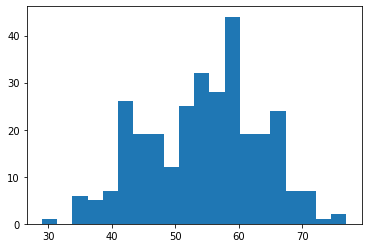

In [3]:
plt.hist(data['age'],bins=20)

([<matplotlib.patches.Wedge at 0x7f8ee0618490>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Male'),
  Text(0.5986244427681994, -0.9228481871469777, 'Female')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.3%'),
  Text(0.3265224233281087, -0.5033717384438059, '31.7%')])

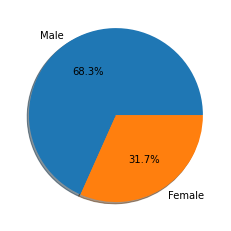

In [4]:
total_male = len(data.loc[data['sex']==1])
total_female = len(data.loc[data['sex']==0])

labels = ['Male','Female']

plt.pie([total_male, total_female], labels=labels, autopct='%1.1f%%', shadow=True, )

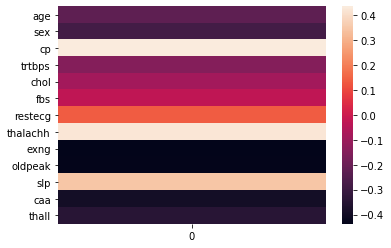

In [5]:
correlations = np.corrcoef(data.T)
corr_target_all = correlations[-1].reshape(14,1)
corr_target = corr_target_all[:13]
sns.heatmap(corr_target, yticklabels=data.columns[:13],)

In [6]:
corr_target_edited = pd.DataFrame(corr_target, index=data.columns[:13], columns=['Absoluted Correlations'])
corr_target_edited = np.abs(corr_target_edited)
corr_target_edited.sort_values(by=['Absoluted Correlations'], ascending=False)

,Absoluted Correlations
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439
trtbps,0.144931


In [7]:
X = data.iloc[:,:13]
y = data['output']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
def ada_classifier(depth, n_estimators):
  classifier = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=depth),
      n_estimators=n_estimators
  )

  return classifier

In [12]:
ada = ada_classifier(1,50).fit(X_train, y_train)
predicted = ada.predict(X_test)

In [15]:
confusion_matrix(y_test, predicted)

array([[25,  6],
       [ 6, 39]])

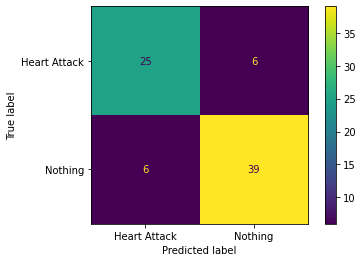

In [23]:
plot_confusion_matrix(ada, X_test, y_test, display_labels=['Heart Attack','Nothing'])